In [3]:
#pip install selenium
import sys
import urllib
import urllib.request
import pandas as pd
import os 
import numpy as np
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen
import time
import urllib.request
import urllib.error
import requests
import random
os.chdir('/Users/saurabhkurjekar/Desktop/RE Docs/RE_Scraping') 

In [55]:
ziplist=[ '30318']#, '78759', '78749', '78723', '78705', '78750', '78717']
len(ziplist)

1

# Fetching all Pages and URLs to be scraped

In [58]:
# Side Cell1
# Getting All URLs from the homepage
# For ignoring SSL certificate errors

list=[]
# zip='30310'

for zip in (ziplist):
    for page_var in ('_rb','2_p','3_p','4_p','5_p','6_p','7_p','8_p','9_p','10_p','11_p','12_p','13_p','14_p'):
        ctx = ssl.create_default_context()
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE
        headers = {
        'authority': 'scrapeme.live',
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'none',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-user': '?1',
        'sec-fetch-dest': 'document',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
        }
        user_agent_list = [
       #Chrome
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        #Firefox
        'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
        'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
        'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
        ]
        user_agent = random.choice(user_agent_list)
        #Set the headers 
        headers = {'User-Agent': user_agent}

        url='https://www.zillow.com/homes/for_sale/' + zip+"/"+page_var   #Postmates
#         req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        req = Request(url, headers=headers)
        webpage = urlopen(req).read()

        # Creating a BeautifulSoup object of the html page for easy extraction of data.

        soup = BeautifulSoup(webpage, 'html.parser')
        html = soup.prettify('utf-8')
        property_json = {}
        for link in soup.find_all('a'):
            list.append(link.get('href'))
            print(list)
#         if len(list)%2 ==0:
#             time.sleep(3)

dfObj = pd.DataFrame(list,columns =['links'])
dfObj.dropna
dfObj1=dfObj[dfObj['links'].str.contains("homedetails",na=False)]
dfObj1.drop_duplicates(subset=None, keep="first", inplace=True)
links_from_Zillow = dfObj1['links'].tolist()
links_from_Zillow
for url in links_from_Zillow:
    print(url)

[None]
[None, '#skip-topnav-target']
[None, '#skip-topnav-target', '/']
[None, '#skip-topnav-target', '/', '/']
[None, '#skip-topnav-target', '/', '/', '/homes/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/', '/atlanta-ga/foreclosures/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/', '/atlanta-ga/foreclosures/', '/atlanta-ga/fsbo/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/', '/atlanta-ga/foreclosures/', '/atlanta-ga/fsbo/', '/atlanta-ga/open-house/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/', '/atlanta-ga/foreclosures/', '/atlanta-ga/fsbo/', '/atlanta-ga/open-house/', '/atlanta-ga/new-homes/']
[None, '#skip-topnav-target', '/', '/', '/homes/', '/atlanta-ga/', '/atlanta-ga/foreclosures/', '/atlanta-ga/fsbo/', '/atlanta-ga/open-house/', '/atlanta-ga/new-homes/', '/atlanta-ga/coming-soon/']
[None, '#skip-topnav-target', '/', '/', '/hom

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



https://www.zillow.com/homedetails/816-Magna-Carta-Dr-NW-Atlanta-GA-30318/35864912_zpid/
https://www.zillow.com/homedetails/758-S-Grand-Ave-NW-Atlanta-GA-30318/35856718_zpid/
https://www.zillow.com/homedetails/1834-Marietta-Rd-NW-Atlanta-GA-30318/35920921_zpid/
https://www.zillow.com/homedetails/1609-Bridgeport-Dr-NW-Atlanta-GA-30318/35924260_zpid/
https://www.zillow.com/homedetails/1199-6th-St-NW-Atlanta-GA-30318/35922943_zpid/
https://www.zillow.com/homedetails/1736-Barfield-Run-NW-Atlanta-GA-30318/69369187_zpid/
https://www.zillow.com/homedetails/1918-Westside-Blvd-Atlanta-GA-30318/2089873691_zpid/
https://www.zillow.com/homedetails/972-Azalee-Wharton-Ave-NW-Atlanta-GA-30318/249123590_zpid/
https://www.zillow.com/homedetails/1542-NW-Dr-NW-Atlanta-GA-30318/2078429143_zpid/
https://www.zillow.com/homedetails/1150-Collier-Rd-NW-2N-Atlanta-GA-30318/2079643803_zpid/
https://www.zillow.com/homedetails/1657-Duncan-Dr-NW-Atlanta-GA-30318/82622311_zpid/
https://www.zillow.com/homedetails/865

/Users/saurabhkurjekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
dfObj1.shape

(471, 1)

In [61]:
dfObj1.sample(3)

,links
944,https://www.zillow.com/homedetails/892-Samples...
2228,https://www.zillow.com/homedetails/433-James-P...
1173,https://www.zillow.com/homedetails/9-Market-Sq...


In [ ]:
# For ignoring SSL certificate errors

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Input from user
Detail_Short=[]
Title=[]
Number_of_Rooms=[]
Floor_Size=[]
Street=[]
Locality=[]
Region=[]
Postal_Code=[]
Price=[]
Image=[]
Time_on_Zillow=[]
Rent_Zestimate=[]
Zestimate=[]
link=[]

Detail_Short1=0
Title1='0'
Number_of_Rooms1='0'
Floor_Size1='0'
Street1='0'
Locality1='0'
Region1='0'
Postal_Code1='0'
Price1='0'
Image1='0'
Time_on_Zillow1='0'
Rent_Zestimate1='0'
Zestimate1='0'
link1='0'

for url in links_from_Zillow:
    # For ignoring SSL certificate errors

    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE
    headers = {
    'authority': 'scrapeme.live',
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'none',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }
    user_agent_list = [
   #Chrome
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
    #Firefox
    'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
    'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
    'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
    'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
    ]
    user_agent = random.choice(user_agent_list)
    #Set the headers 
    headers = {'User-Agent': user_agent}
    # Making the website believe that you are accessing it using a different browser
    print(url)
    req = Request(url, headers=headers)
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    property_json = {}



    for title in soup.findAll('title'):
        property_json['Title'] = title.text.strip()
        Title1=title.text.strip()
        break

    for meta in soup.findAll('meta', attrs={'name': 'description'}):

        property_json['Detail_Short'] = meta['content'].strip()
        if 'Detail_Short' in property_json:
#                 Number_of_Rooms1 = json_data['numberOfRooms']
            Detail_Short1= meta['content'].strip()
        else:
            Detail_Short1 = 0
    for div in soup.findAll('div', attrs={'class': 'character-count-truncated'}):
        property_json['Details_Broad']['Description'] = div.text.strip()

    for (i, script) in enumerate(soup.findAll('script',
                                 attrs={'type': 'application/ld+json'})):



        if i == 0:
            json_data = json.loads(script.text)
            if 'numberOfRooms' in json_data:
                Number_of_Rooms1 = json_data['numberOfRooms']
            else:
                Number_of_Rooms1 = 0
            if 'floorSize' in json_data:
                Floor_Size1 = json_data['floorSize']['value']
            else:
                Floor_Size1 = 0
            if 'address' in json_data:
                Street1 = json_data['address']['streetAddress']
                Locality1 = json_data['address']['addressLocality']
                Region1 = json_data['address']['addressRegion']
                Postal_Code1 = json_data['address']['postalCode']
            else:
                Street1=0
                Locality1=0
                Region1=0
                Postal_Code1 = 0

        if i == 1:
            json_data = json.loads(script.text)
            if 'offers' in json_data:
                Price1 = json_data['offers']['price']
            else:
                Price1 = 0
            if 'image' in json_data:
                Image1 = json_data['image']
            else:
                Image1 = 0

    result = soup.find(string="Time on Zillow")
    if result:
        Time_on_Zillow1=soup.find(string="Time on Zillow").find_next('div').contents[0]
    else: 
        Time_on_Zillow1=0

    result = soup.find(string="Rent Zestimate")
    if result:
        li = soup.find(string="Rent Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Rent_Zestimate1=child.contents[0]
    else: 
        Rent_Zestimate1=0

        
        
#     result = soup.find(string="Zestimate")
#     if result:
#         li = soup.find(string="Zestimate").find_next('div').contents[0]
#         children = li.findChildren( recursive=False)
#         for child in children:
#             if len(child.contents)>0:
#                 child.contents[0]
#                 Zestimate1=child.contents[0]
#     else: 
#         Zestimate1=[]


        
#     result = soup.find(string="Zestimate")   
    home_value_div=soup.find("div", {"id": "ds-home-values"})
    result = home_value_div.find(string="Zestimate")
    if result:
        li=home_value_div.find(string="Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Zestimate1=child.contents[0]
    else:
        Zestimate1=[]

    print(Zestimate1)


    Detail_Short.append(Detail_Short1)
    Title.append(Title1)
    Number_of_Rooms.append(Number_of_Rooms1)
    Floor_Size.append(Floor_Size1)
    Street.append(Street1)
    Locality.append(Locality1)
    Region.append(Region1)
    Postal_Code.append(Postal_Code1)
    Price.append(Price1)
    Image.append(Image1)

    Time_on_Zillow.append(Time_on_Zillow1)
    Rent_Zestimate.append(Rent_Zestimate1)
    Zestimate.append(Zestimate1)

    link.append(url)
    
#     if len(link)%2 ==0:
    time.sleep(15)

# print(Zestimate)

https://www.zillow.com/homedetails/816-Magna-Carta-Dr-NW-Atlanta-GA-30318/35864912_zpid/
$214,159
https://www.zillow.com/homedetails/758-S-Grand-Ave-NW-Atlanta-GA-30318/35856718_zpid/
$238,440
https://www.zillow.com/homedetails/1834-Marietta-Rd-NW-Atlanta-GA-30318/35920921_zpid/
[]
https://www.zillow.com/homedetails/1609-Bridgeport-Dr-NW-Atlanta-GA-30318/35924260_zpid/
$149,317
https://www.zillow.com/homedetails/1199-6th-St-NW-Atlanta-GA-30318/35922943_zpid/
[]
https://www.zillow.com/homedetails/1736-Barfield-Run-NW-Atlanta-GA-30318/69369187_zpid/
$575,002
https://www.zillow.com/homedetails/1918-Westside-Blvd-Atlanta-GA-30318/2089873691_zpid/
$694,753
https://www.zillow.com/homedetails/972-Azalee-Wharton-Ave-NW-Atlanta-GA-30318/249123590_zpid/
$599,002
https://www.zillow.com/homedetails/1542-NW-Dr-NW-Atlanta-GA-30318/2078429143_zpid/
[]
https://www.zillow.com/homedetails/1150-Collier-Rd-NW-2N-Atlanta-GA-30318/2079643803_zpid/
$223,524
https://www.zillow.com/homedetails/1657-Duncan-Dr-N

In [54]:

df = pd.DataFrame(np.column_stack([
Title,
Number_of_Rooms,
Floor_Size,
Street,
Locality,
Region,
Postal_Code,
Price,
Image,
Time_on_Zillow,
Rent_Zestimate,
Zestimate,
link,
Detail_Short]), 
columns=[
'Title',
'Number_of_Rooms',
'Floor_Size',
'Street',
'Locality',
'Region',
'Postal_Code',
'Price',
'Image',
'Time_on_Zillow',
'Rent_Zestimate',
'Zestimate',
'link',
'Detail_Short'])
df.to_csv('scraped_data.csv')
df.sample(3)


,Title,Number_of_Rooms,Floor_Size,Street,Locality,Region,Postal_Code,Price,Image,Time_on_Zillow,Rent_Zestimate,Zestimate,link,Detail_Short
10,"6844 Cavalier Ct, Stone Mountain, GA 30087 | M...",4,"3,263",6844 Cavalier Ct,Stone Mountain,GA,30087,259000,https://photos.zillowstatic.com/p_h/IS3vwccg80...,2 days,"$1,650","$240,018",https://www.zillow.com/homedetails/6844-Cavali...,"6844 Cavalier Ct , Stone Mountain, GA 30087-63..."
15,"1422 Baron Ct, Stone Mountain, GA 30087 | MLS ...",4,"3,930",1422 Baron Ct,Stone Mountain,GA,30087,298000,https://photos.zillowstatic.com/p_h/ISrhin4bj2...,47 days,"$1,850","$293,467",https://www.zillow.com/homedetails/1422-Baron-...,"1422 Baron Ct , Stone Mountain, GA 30087-3037 ..."
3,"6962 Waters Edge Dr, Stone Mountain, GA 30087 ...",4,"2,429",6962 Waters Edge Dr,Stone Mountain,GA,30087,219900,https://photos.zillowstatic.com/p_h/ISrpk20ac4...,2 days,"$1,604","$229,001",https://www.zillow.com/homedetails/6962-Waters...,"6962 Waters Edge Dr , Stone Mountain, GA 30087..."


In [42]:
#Delete this cell later
url='https://www.zillow.com/homedetails/299-Mountain-Dr-Stone-Mountain-GA-30087/2081365282_zpid/'
headers = {'User-Agent': user_agent}
# Making the website believe that you are accessing it using a different browser
print(url)
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

soup = BeautifulSoup(webpage, 'html.parser')
html = soup.prettify('utf-8')
property_json = {}

https://www.zillow.com/homedetails/299-Mountain-Dr-Stone-Mountain-GA-30087/2081365282_zpid/


<!DOCTYPE html>
<html class="no-js zsg-theme-modernized null" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#">
<head>
<script>(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
        (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
        m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
        })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');</script><script>window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;
    ga("create","UA-21174015-56", "auto", {allowLinker:true});
    ga('set','dimension1', '72a1669fa1184e32a83d4cf718f6678e');
    ga('set','dimension191', '');
    /* Queue for Global UA Object */
    (function(w,n){w[n]=w[n]||function(){(w[n].q=w[n].q||[]).push(
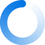

In [43]:
soup

In [52]:
# test=soup.find("div", {"id": "ds-home-values"})
# soup.find("div", {"id": "ds-home-values","class":"Text-aiai24-0"})
# div=soup.find("div", {"id": "ds-home-values"})
# content = str(div)

# print(content[150:])
test=soup.find("div", {"id": "ds-home-values"})
result = test.find(string="Zestimate")
print(result)
# li=test.find(string="Zestimate").find_next('div').contents[0]
# children = li.findChildren( recursive=False)
# for child in children:
#     if len(child.contents)>0:
#         child.contents[0]
#         Zestimate1=child.contents[0]
# Zestimate1
# Text-aiai24-0

None
